## SOM Clustering - CB4_64_16D_STK_1

This document presents an example of spectral clustering in the CBERS4 collection V1 (CB4_64_16D_STK_1) of the BDC.

> This simple example aims to present how to clustering the data from the BDC stored inside the ODC. To know all the possible products, use [BDC-STAC](http://brazildatacube.dpi.inpe.br/stac/).

In [1]:
import datacube
import numpy as np
import matplotlib.pyplot as plt
dc = datacube.Datacube(app='datacube')

In [2]:
PRODUCT_NAME = "CB4_64_16D_STK_1"

**Load CB4_64_16D_STK_1 product**

Initially, an entire scene will be loaded, in a range of specific dates

In [3]:
cb4_64_16d_ftile = dc.load(PRODUCT_NAME, measurements = ['red', 'green', 'blue', 'nir'], 
                                            time = ("2019-08"), resolution = (64, -64), limit = 2)
cb4_64_16d_ftile

<xarray.Dataset>
Dimensions:      (time: 1, x: 21008, y: 20597)
Coordinates:
  * time         (time) datetime64[ns] 2019-09-05T12:00:00
  * y            (y) float64 8.778e+06 8.778e+06 8.778e+06 ... 1.01e+07 1.01e+07
  * x            (x) float64 6.307e+06 6.307e+06 ... 4.963e+06 4.963e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 1438 1391 -9999
    green        (time, y, x) int16 -9999 -9999 -9999 -9999 ... 1378 1327 -9999
    blue         (time, y, x) int16 -9999 -9999 -9999 -9999 ... 1030 1054 -9999
    nir          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 3431 3420 -9999
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

The example will use only a portion of the data that was uploaded. If necessary, in your analysis you can use the whole scene that was uploaded.

In [4]:
cb4_64_16d_stile = cb4_64_16d_ftile.isel(x = slice(0, 2000), y = slice(0, 2000))
cb4_64_16d_stile

<xarray.Dataset>
Dimensions:      (time: 1, x: 2000, y: 2000)
Coordinates:
  * time         (time) datetime64[ns] 2019-09-05T12:00:00
  * y            (y) float64 8.778e+06 8.778e+06 ... 8.906e+06 8.906e+06
  * x            (x) float64 6.307e+06 6.307e+06 ... 6.179e+06 6.179e+06
    spatial_ref  int32 0
Data variables:
    red          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 653 700 698 859
    green        (time, y, x) int16 -9999 -9999 -9999 -9999 ... 711 738 771 879
    blue         (time, y, x) int16 -9999 -9999 -9999 -9999 ... 398 408 434 478
    nir          (time, y, x) int16 -9999 -9999 -9999 -9999 ... 2723 3084 3347
Attributes:
    crs:           +proj=aea +lat_0=-12 +lon_0=-54 +lat_1=-2 +lat_2=-22 +x_0=...
    grid_mapping:  spatial_ref

Viewing the selected region

In [5]:
from utils.data_cube_utilities.dc_rgb import rgb

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d9b760ef0>)

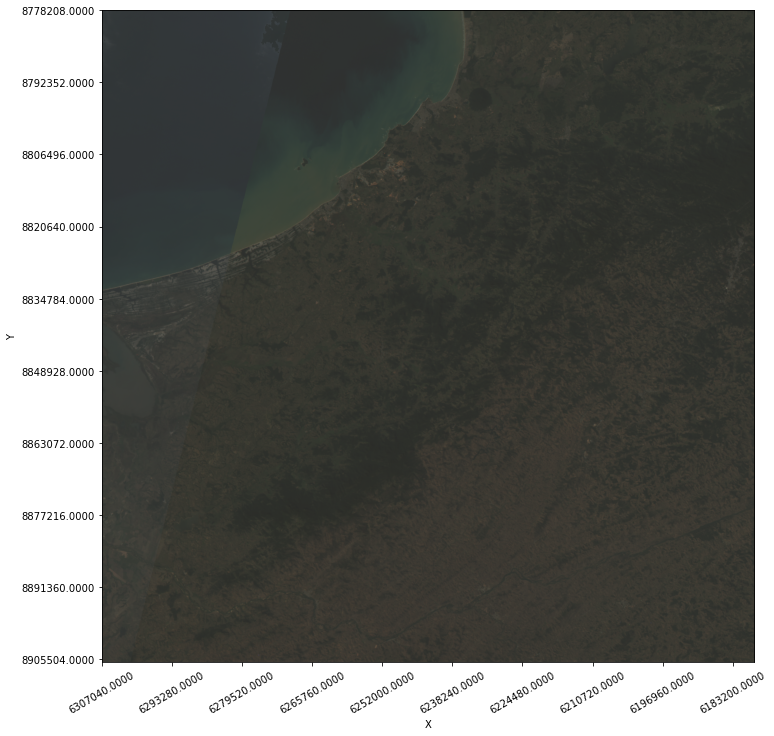

In [6]:
rgb(cb4_64_16d_stile, figsize = (12, 12), x_coord = 'x', y_coord = 'y')

## Clustering with SOM

In this section, the clustering using SOM is performed

In [7]:
import SimpSOM as sps
from utils.data_cube_utilities.dc_clustering import clustering_pre_processing

Below is the definition of the bands and the preparation of the data for clustering

In [8]:
bands = ['red', 'green', 'nir']

In [9]:
cb4_64_16d_stilec = cb4_64_16d_stile.copy()
cb4_64_16d_stilec_rgb = cb4_64_16d_stilec[bands]

cb4_64_16d_stilec_rgb = cb4_64_16d_stilec_rgb.sel(time = '2019-09-05')

Creating features to classification

In [10]:
features = clustering_pre_processing(cb4_64_16d_stilec_rgb, bands)

In [11]:
net = sps.somNet(20, 20, features, PBC = True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


Training!

In [12]:
net.train(0.01, 5000)

Training SOM... done!


Visualizing the results

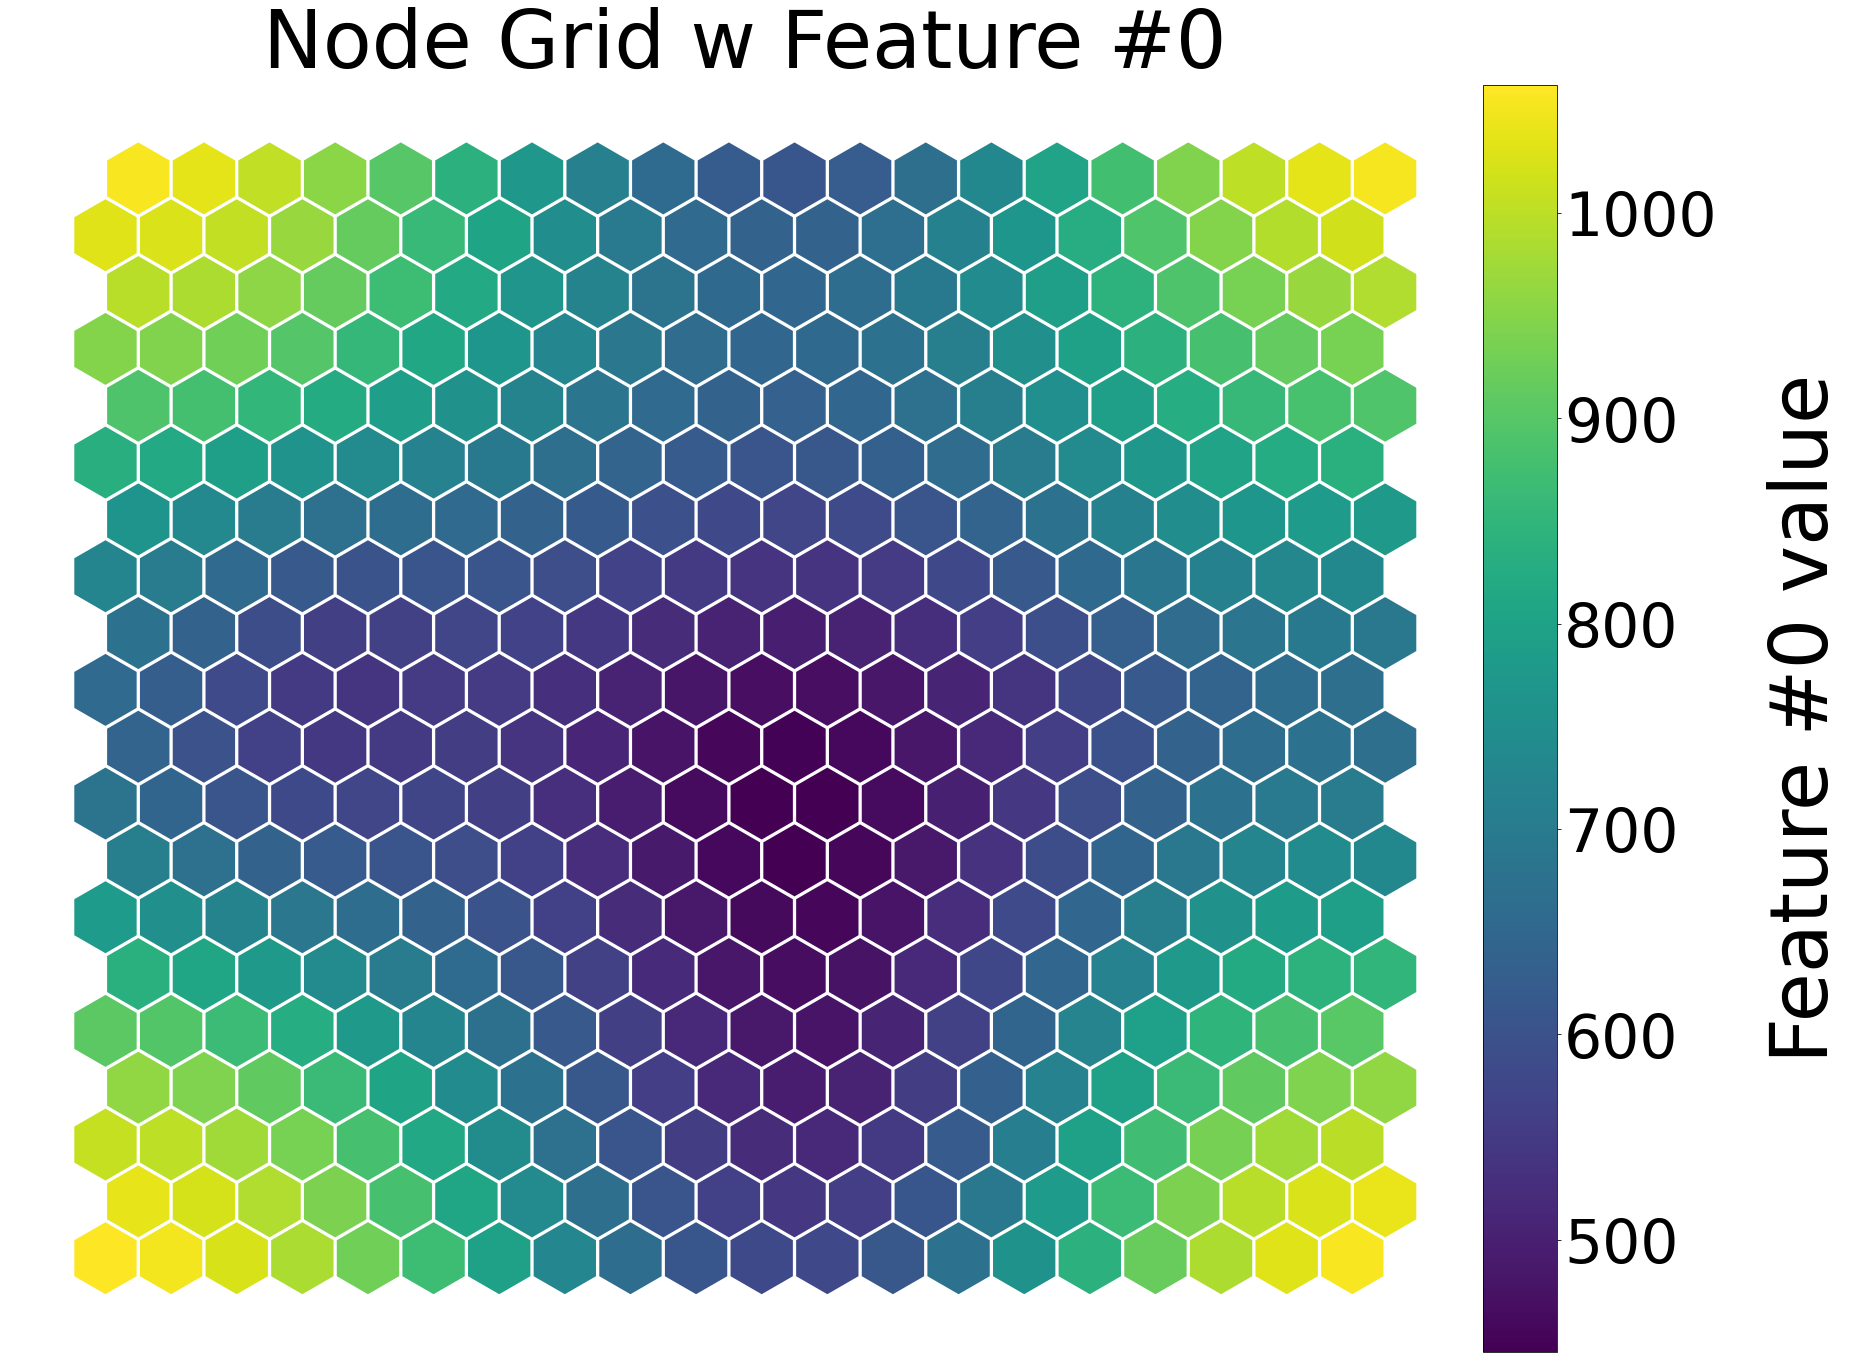

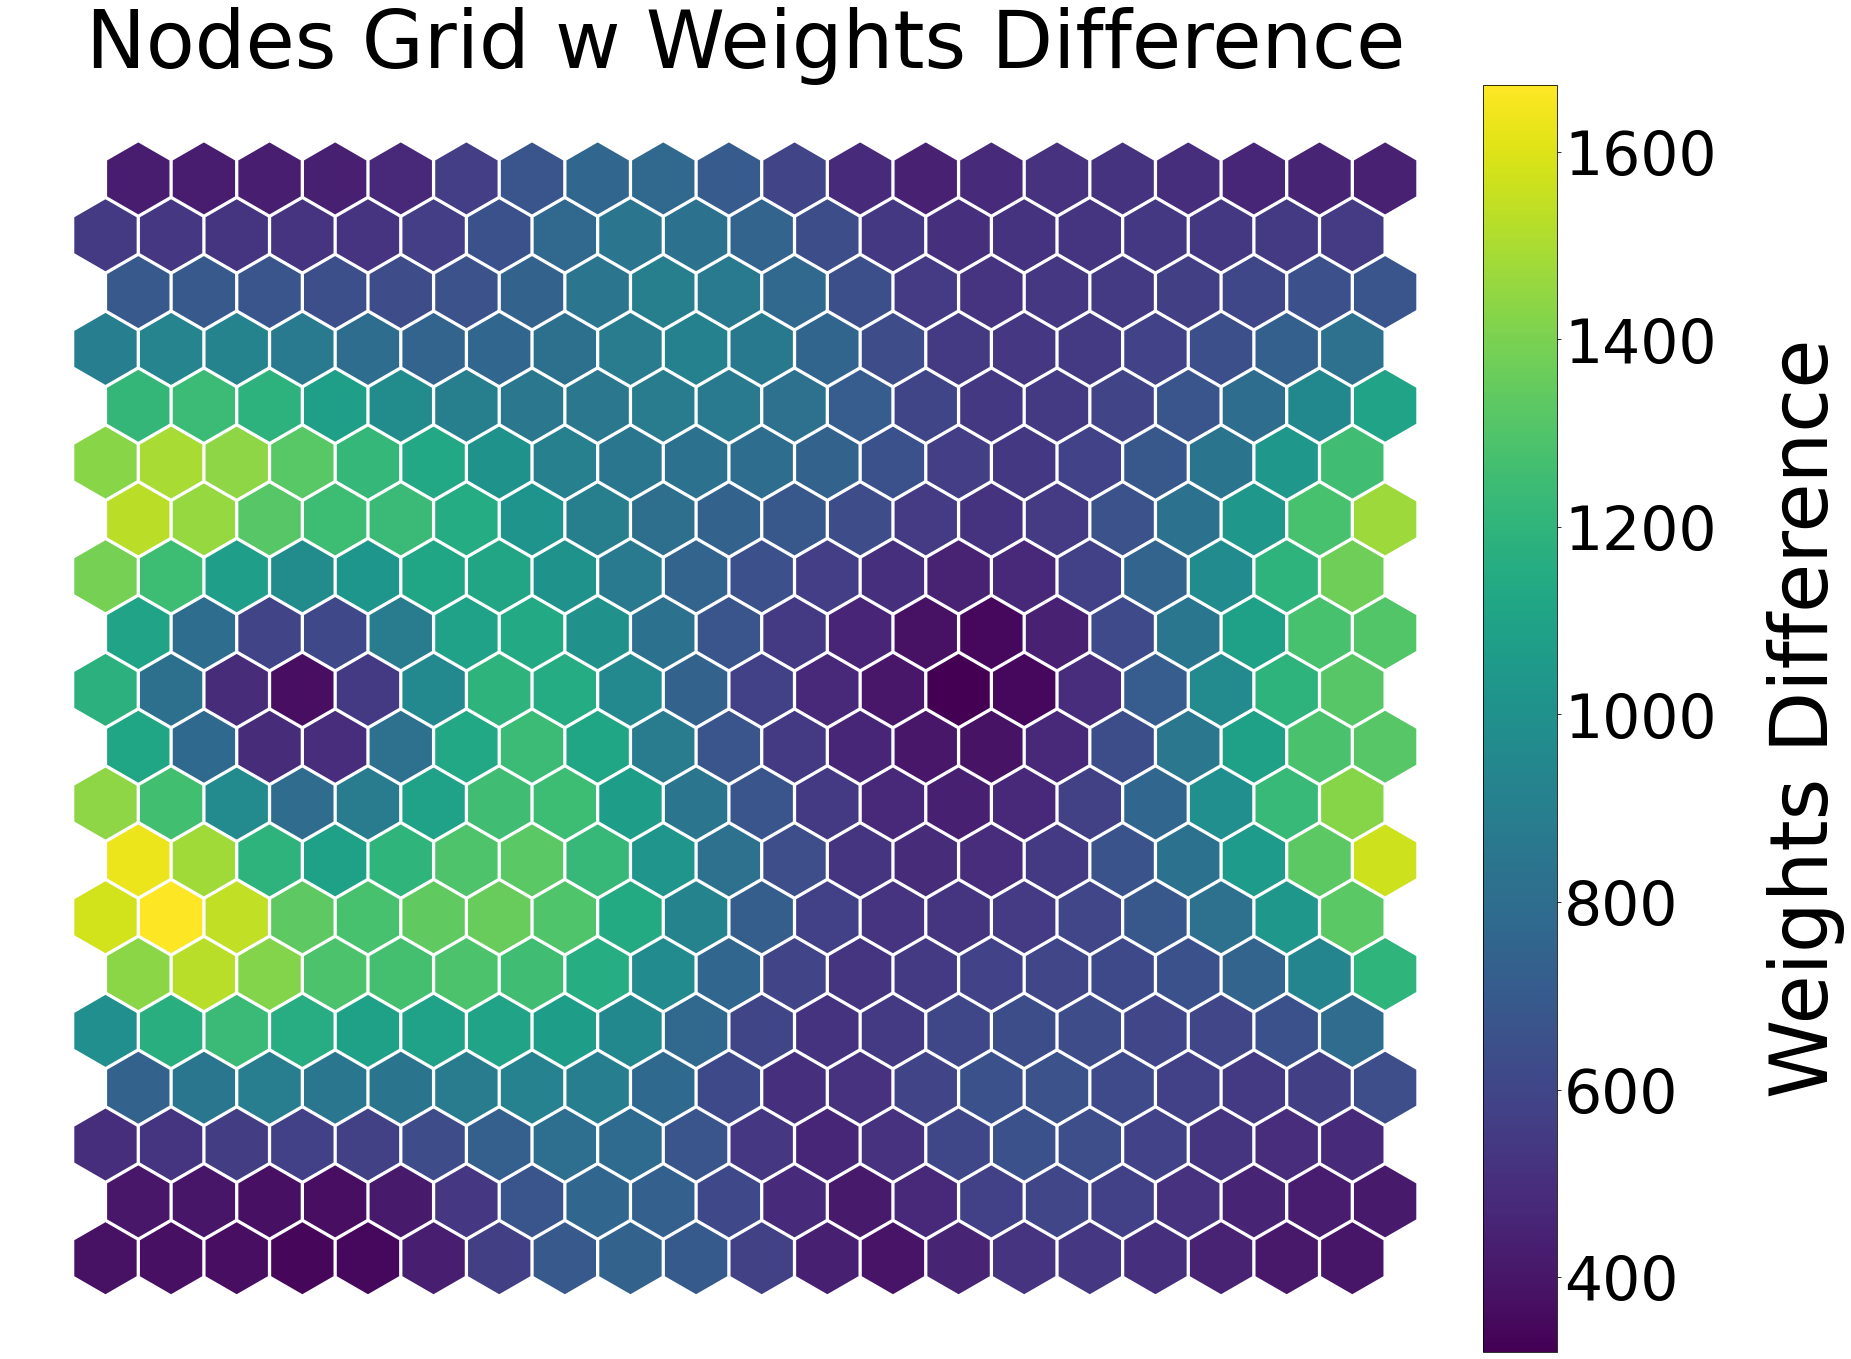

In [13]:
net.nodes_graph(colnum = 0)
net.diff_graph()

Clustering the datapoints using threshold algorithm

In [ ]:
net.cluster(features, type='qthresh')

Saving the results

In [ ]:
net.save('cb4_weights_500it_001lr')